## TOP 30 GS, MM, LM

## Linear regression for the TOP 30 genes based on the Gene-Significance (GS) & Module-Membership (MM)

Made by: Cynthia Soto<br>
Date: xxx xxx, 2022<br>
Last md: June 6, 2022 <br>

**Assumptions:**<br>
A tvs files are provided with the top GS 15 genes & top 15 MM genes. <br>
This files were downloaded with the GS & MM functions from WGCNA. <br>
**Input:** <br>
file_nameKc = "Ch22_Module_<color_name>_kWithin_Top30" <br>
file_nameGS = "Ch22_Module_<color_name>_MM_GS_Top30" <br>
Ref: Suplementary file *5_Darkmagenta_DAVID_Clustering_Decomposition.xls* <br>

**Code goal:** <br>
1. Make a linear regression based on the GS & MM data provided.
2. Get some stats.
3. Plot.

In [4]:
#import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

# graficos embebidos
%matplotlib inline

In [12]:
try:
    # Change the current working Directory to the quantification dir
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/MG_top30_WGCNA/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/MG_top30_WGCNA


#### Require mathplot_venn library
To install: <br>
pip3 install matplotlib_venn <br>
matplotlib-venn-0.11.5 <br>

In [13]:
# Modules to analize
#file_nameGS = "Bc24_Module_firebrick2_MM_GS_Top15"
file_nameKc = "Ch22_Module_darkmagenta_kWithin_Top30" 
file_nameGS = "Ch22_Module_darkmagenta_MM_GS_Top30"

### Subset GS_MM

In [14]:
file = file_nameGS  
df = pd.read_csv(file_nameGS, delimiter='\s+', header=0)
module_name = file.split(sep="_")[2]
module_name

'darkmagenta'

In [15]:
print(df.shape)
print(df.columns)
#set_GSMM = set(df['Genes'].drop_duplicates().to_list())
df.head(15)

(30, 3)
Index(['Genes', 'abs.geneModuleMembership', 'abs.geneTraitSignificance'], dtype='object')


,Genes,abs.geneModuleMembership,abs.geneTraitSignificance
0,AT1G03830,0.941110,0.696268
1,AT1G05570,0.957637,0.500524
2,AT1G05830,0.950994,0.613616
3,AT1G07820,0.949708,0.520727
4,AT1G08590,0.899483,0.605091
5,AT1G08680,0.944603,0.535685
6,AT1G09000,0.901088,0.456120
7,AT1G14910,0.956047,0.514937
8,AT1G17210,0.935913,0.606131
9,AT1G18950,0.982216,0.537744


In [16]:
lst = df['Genes'].to_list()
set_GSMM = set()
print(file)
for s in lst:
    print(s+',')
    set_GSMM.add(s)
#set_kconn

Ch22_Module_darkmagenta_MM_GS_Top30
AT1G03830,
AT1G05570,
AT1G05830,
AT1G07820,
AT1G08590,
AT1G08680,
AT1G09000,
AT1G14910,
AT1G17210,
AT1G18950,
AT1G19300,
AT1G20760,
AT1G22910,
AT1G23190,
AT1G27440,
AT1G28110,
AT1G28350,
AT1G32760,
AT1G34270,
AT1G47290,
AT1G50620,
AT1G53730,
AT1G54200,
AT1G58025,
AT1G58220,
AT1G58350,
AT1G60070,
AT1G62970,
AT1G63110,
AT1G63690,


In [17]:
plt.style.use

<function matplotlib.style.core.use(style)>

<Figure size 1800x1800 with 0 Axes>

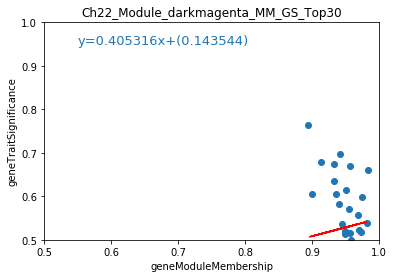

In [18]:
# make data
from matplotlib.pyplot import figure
import numpy

x = df['abs.geneModuleMembership'].to_numpy()
y = df['abs.geneTraitSignificance'].to_numpy()

# plot
labelx = "geneModuleMembership"
labely = "geneTraitSignificance"
figure(figsize=(6, 6), dpi=300)
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=1)

ax.set(xlim=(0.5, 1),xlabel=labelx,
       ylim=(0.5, 1),ylabel=labely, 
       title=file_nameGS)

# calc the trendline
z = numpy.polynomial.polynomial.polyfit(x, y, 1)
p = numpy.poly1d(z)
ax.plot(x,p(x),"r--")
# the line equation:
eq = "y=%.6fx+(%.6f)"%(z[0],z[1])
ax.text(0.55, 0.95, eq, {'color': 'C0', 'fontsize': 13})
#print (eq)

plt.show()

### Subset k-connectivity

In [19]:
file = file_nameKc
df = pd.read_csv(file_nameKc, delimiter='\s+', header=0)  #sep='\t', 
#set_knn = set(df['Genes'].drop_duplicates().to_list())
df.head(15)

,Genes,kTotal,kWithin,kOut,kDiff
0,AT1G79990,308.7332,59.78650,248.9467,-189.1602
1,AT5G12350,306.7064,57.71861,248.9878,-191.2692
2,AT3G01590,285.1934,56.46979,228.7236,-172.2538
3,AT4G27060,290.2882,55.03298,235.2552,-180.2222
4,AT1G58220,330.0118,53.55086,276.4609,-222.9101
5,AT1G18950,318.4421,52.98170,265.4604,-212.4787
6,AT3G26720,314.4827,51.19667,263.2861,-212.0894
7,AT5G13710,280.7755,50.71963,230.0559,-179.3362
8,AT2G26300,261.2472,50.71308,210.5341,-159.8210
9,AT2G01720,272.5750,49.98906,222.5859,-172.5969


In [20]:
lst = df['Genes'].to_list()
set_knn = set()
print(file)
for s in lst:
    print(s+',')
    set_knn.add(s)
#set_kconn

Ch22_Module_darkmagenta_kWithin_Top30
AT1G79990,
AT5G12350,
AT3G01590,
AT4G27060,
AT1G58220,
AT1G18950,
AT3G26720,
AT5G13710,
AT2G26300,
AT2G01720,
AT5G46340,
AT2G30260,
AT3G28860,
AT1G76460,
AT4G20400,
AT2G35110,
AT1G28350,
AT2G27230,
AT2G01820,
AT1G60070,
AT2G27900,
AT3G20390,
AT1G20760,
AT1G63110,
AT2G05170,
AT5G08450,
AT3G45100,
AT3G44330,
AT3G01450,
AT2G47760,


<Figure size 1800x1800 with 0 Axes>

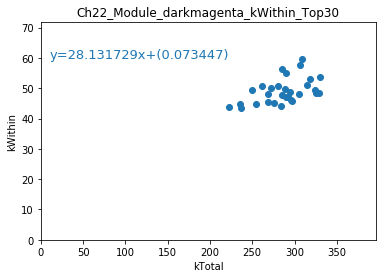

In [21]:
x = df['kTotal'].to_numpy()
y = df['kWithin'].to_numpy()

# plot
labelx = "kTotal"
labely = "kWithin"
figure(figsize=(6, 6), dpi=300)
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=max(x))

ax.set(xlim=(0, max(x)+(max(x)/5)),xlabel=labelx,
       ylim=(0, max(y)+(max(y)/5)),ylabel=labely, 
       title=file_nameKc)

# calc the trendline
z = numpy.polynomial.polynomial.polyfit(x, y, 1)
p = numpy.poly1d(z)
ax.plot(x,p(x),"r--")
# the line equation:
eq = "y=%.6fx+(%.6f)"%(z[0],z[1])
ax.text(10, max(y), eq, {'color': 'C0', 'fontsize': 13})
#print (eq)

plt.show()

### Operaciones lógicas 

In [22]:
# Cardinalidad de un conjunto con len().
### print("La cardinalidad del conjunto A.thaliana sana = {0} es {1}".format(set1_ctrl,len(set1_ctrl)))  
print("La cardinalidad del conjunto kconn es {0}".format(len(set_knn)))  
print("La cardinalidad del conjunto MM y GS es {0}".format(len(set_GSMM)))  

La cardinalidad del conjunto kconn es 30
La cardinalidad del conjunto MM y GS es 30


In [23]:
# Igualdad
set_GSMM == set_knn

False

In [24]:
# Subconjunto: ¿estan los genes del conjunto de infectadas en el conjunto de control?
# set_MM_GS.issubset(set_kconn)

In [47]:
# Intersección de conjuntos
intersec = set_GSMM.intersection(set_knn)
lng_inter = len(intersec)
intersec

{'AT1G18950', 'AT1G20760', 'AT1G28350', 'AT1G58220', 'AT1G60070', 'AT1G63110'}

In [57]:
if not lng_inter:
    print("Module "+ module_name +" has none genes intersecting in the Top MM_GS and Top kconn sets")
else:
    print("Module "+ module_name +" has "+ str(lng_inter) +" genes intersecting in the Top MM_GS and Top kconn sets")
    lst_intersec=list(intersec)
    #print(lst_intersec)
 
lst_no_quotes = ' '.join(map(str,lst_intersec))
print(lst_no_quotes)

Module darkmagenta has 6 genes intersecting in the Top MM_GS and Top kconn sets
AT1G18950 AT1G58220 AT1G28350 AT1G60070 AT1G20760 AT1G63110


In [60]:
union = set_GSMM.union(set_knn)
len(union)

54

In [28]:
union

{'AT1G03830',
 'AT1G05570',
 'AT1G05830',
 'AT1G07820',
 'AT1G08590',
 'AT1G08680',
 'AT1G09000',
 'AT1G14910',
 'AT1G17210',
 'AT1G18950',
 'AT1G19300',
 'AT1G20760',
 'AT1G22910',
 'AT1G23190',
 'AT1G27440',
 'AT1G28110',
 'AT1G28350',
 'AT1G32760',
 'AT1G34270',
 'AT1G47290',
 'AT1G50620',
 'AT1G53730',
 'AT1G54200',
 'AT1G58025',
 'AT1G58220',
 'AT1G58350',
 'AT1G60070',
 'AT1G62970',
 'AT1G63110',
 'AT1G63690',
 'AT1G76460',
 'AT1G79990',
 'AT2G01720',
 'AT2G01820',
 'AT2G05170',
 'AT2G26300',
 'AT2G27230',
 'AT2G27900',
 'AT2G30260',
 'AT2G35110',
 'AT2G47760',
 'AT3G01450',
 'AT3G01590',
 'AT3G20390',
 'AT3G26720',
 'AT3G28860',
 'AT3G44330',
 'AT3G45100',
 'AT4G20400',
 'AT4G27060',
 'AT5G08450',
 'AT5G12350',
 'AT5G13710',
 'AT5G46340'}